In [1]:
import pickle
import glob, os
dataset_id = "ID45"

data_dir="/workdir/jupyter/Cosy2021_tot_data_taking_data"
# data_dir="/workdir/jupyter/Dlab_2021_tot_data_taking_data"
data_file_list = []
for file in glob.glob("{:s}/*{:s}*".format(data_dir,dataset_id)):
# archive(label="ID_{:s}_tot_data_cosy2021_lena_newMBOs".format(dataset_id))
    data_file_list += [file ]

#list_file ="/workdir/jupyter/Cosy2021_tot_data_taking_data/datasetID_11_gainscan_spikerejVer5_highbeamintensity_list.pickle"
#list_file ="ID10_gainscan_spikerejVer5_NoBeamNoise_HV1750V_ptime_10_thr_5_gain_4_boardsON_0_sr_0"
# if ".pickle" in list_file:
#     with open (list_file,'rb') as fp:
#      data_file_list = pickle.load(fp) 
print(data_file_list)


['/workdir/jupyter/Cosy2021_tot_data_taking_data/ID45_final_highstat_settingc_HV1750V_ptime_10_thr_9_gain_2_boardsON_0_sr_0_srTDC_0.root']


Welcome to JupyROOT 6.14/04
data file   , tot_mostprob signalcounts noisecounts sn_ratio significance
/workdir/jupyter/Cosy2021_tot_data_taking_data/ID45_final_highstat_settingc_HV1750V_ptime_10_thr_9_gain_2_boardsON_0_sr_0_srTDC_0.root
Cosy2021_tot_data_taking_data/ID45_final_highstat_settingc_HV1750V_ptime_10_thr_9_gain_2_boardsON_0_sr_0_srTDC_0. |  14.5 |  19720.0 |  13404.0 |  1.47 |  108.35
19720.0
eff :  1.933316430020284
noise eff :  1.2037451507012833


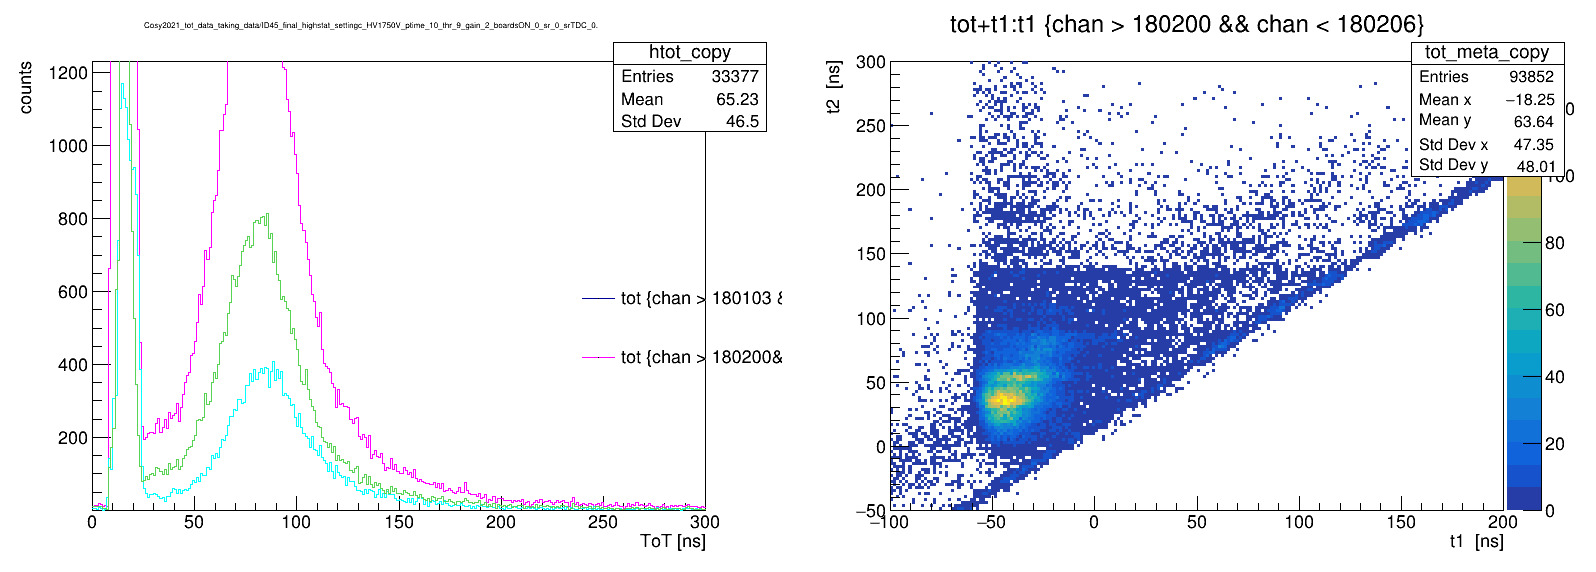

In [2]:

##################################################
##               slurp root file                ##
##################################################
 
#with open ('/workdir/jupyter/tot_data_taking_data/HV1600V_ptime_15_threshold_50_gain_4_boardsON_23.rootlist.pickle', 'rb') as fp:
import ROOT
import numpy as np

#f = ROOT.TFile("/workdir/tree_out.root".format(data_dir))
#tree = f.Get("TDC_1503")
#print("data entries TDC_1503: " + str(tree.GetEntries()))
i = -1
clist = [None]*100
print("data file   ,", "tot_mostprob", "signalcounts", "noisecounts", "sn_ratio", "significance")
    
for data_file in data_file_list:
    i += 1
    print(data_file)
    f = ROOT.TFile("{:s}".format(data_file))
    #f = ROOT.TFile("{:s}".format("/workdir/tree_out.root"))    
    tree = f.Get("joint_tree")
    #tree = f.Get("TDC_1800")
    #print("data entries: " + str(tree.GetEntries()))
    ## plot data:
    clist[i] = ROOT.TCanvas("myCanvasName"+str(i),str(data_file),1600,600)
    clist[i].Divide(2,1)
    clist[i].cd(1)    
    tree.Draw("tot>>htot(300,0,300)","chan > 180103 && chan < 180105")
    #tree.Draw("tot>>htot2(300,0,300)","chan > 035300 && chan < 035316","same")   
    tree.Draw("tot>>htot3(300,0,300)","chan == 180104") 
    tree.Draw("tot>>htot4(300,0,300)","chan >= 180204 && chan <= 180205") 
    tree.Draw("tot>>htot2(300,0,300)","chan > 180200&& chan < 180216")    
    #tree = f.Get("TDC_1503")
#     tree.Draw("tot>>htot(100,0,300)","chan == 180105") 
#     tree.Draw("tot>>htot2(100,0,300)","chan == 180204")
    
   # clist[i].Draw()
    htot = f.Get("htot")
    htot2 = f.Get("htot2")
    htot3 = f.Get("htot3")
    htot4 = f.Get("htot4")    
    
    htot.GetXaxis().SetTitle("ToT [ns]")
    htot.GetYaxis().SetTitle("counts")
    leg = ROOT.TLegend(.73,.32,.97,.53)
    leg.SetBorderSize(0)
    leg.SetFillColor(0)
    leg.SetFillStyle(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.035)
    leg.AddEntry(htot,htot.GetTitle());
    leg.AddEntry(htot2,htot2.GetTitle());
#     leg.AddEntry(htot3,htot3.GetTitle());
#     leg.AddEntry(htot4,htot4.GetTitle());     
    
    htot.SetTitle(data_file.strip("workdir/jupyter/tot_data_taking_data"))
    htot2.SetLineColor(6)
    htot.SetMinimum(0.1)
    htot.DrawCopy("")
    htot2.DrawCopy("same")
    htot3.SetLineColor(7)
    htot3.DrawCopy("same")
    htot4.SetLineColor(8)
    htot4.DrawCopy("same")
   
    leg.Draw();
    clist[i].SetLogy()
    clist[i].Draw()
    clist[i].cd(2)      
#     tree.Draw("tot:t1>>tot_meta(200,-200,200,200,0,400)","chan > 180103 && chan < 180105","p0")
#     tree.Draw("tot:t1>>tot_meta(200,-100,200,200,0,250)","chan > 180100 && chan < 180112","colz")    
    tree.Draw("tot+t1:t1>>tot_meta(200,-100,200,150,-50,300)","chan > 180200 && chan < 180206","colz")
#     tree.Draw("tot+t1:t1>>tot_meta(100,-100,200,150,-50,300)","chan > 35100 && chan < 35199 && tot >50","colz")    
    potato = f.Get("tot_meta")
#     potato.GetYaxis().SetTitle("ToT [ns]")
    potato.GetYaxis().SetTitle("t2  [ns]")   
    potato.GetXaxis().SetTitle("t1  [ns]")    
    potato.DrawCopy("colz")
    
    tdc=1802
    disp_channels = 99

#     tree.Draw("tot+t1>>potato(300,-100,300)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"")
#     htot = f.Get("potato")
#     htot.GetXaxis().SetTitle("t_{2} [ns]")
#     htot.DrawCopy("")  
    clist[i].Draw()
    
    
    tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    
    signalcounts  = htot.Integral(htot.FindBin(50),htot.GetNbinsX())
    noisecounts   = htot.Integral(1,htot.FindBin(50))
    if noisecounts == 0:
        sn_ratio = -1
        significance = -1
    else:
        sn_ratio = signalcounts/noisecounts
        significance = signalcounts/np.sqrt(signalcounts+noisecounts)
    print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance))
    
    tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    ### efficiency 
    totcut_eff = 50
    signalcounts  = htot3.Integral(htot3.FindBin(totcut_eff),htot3.GetNbinsX())
    noisecounts   = htot3.Integral(1,htot3.FindBin(totcut_eff))
    print(signalcounts)
    signalcounts2  = htot4.Integral(htot4.FindBin(totcut_eff),htot4.GetNbinsX())
    noisecounts2   = htot4.Integral(1,htot4.FindBin(totcut_eff))
    print("eff : ", signalcounts2/signalcounts)

    print("noise eff : ", noisecounts2/noisecounts)

In [3]:
tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    
signalcounts  = htot3.Integral(htot3.FindBin(40),htot3.GetNbinsX())
noisecounts   = htot3.Integral(1,htot3.FindBin(40))
print(signalcounts)
signalcounts2  = htot2.Integral(htot2.FindBin(40),htot2.GetNbinsX())
noisecounts2   = htot2.Integral(1,htot2.FindBin(40))
print(signalcounts,signalcounts2)
print(signalcounts/signalcounts2)
print(noisecounts/noisecounts2)
if noisecounts == 0:
    sn_ratio = -1
    significance = -1
else:
    sn_ratio = signalcounts/noisecounts
    significance = signalcounts/np.sqrt(signalcounts+noisecounts)
print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance))


20304.0
20304.0 86425.0
0.2349320219843795
0.16548790421639234
Cosy2021_tot_data_taking_data/ID45_final_highstat_settingc_HV1750V_ptime_10_thr_9_gain_2_boardsON_0_sr_0_srTDC_0. |  14.5 |  20304.0 |  12799.0 |  1.59 |  111.60


In [4]:

c = ROOT.TCanvas("correl","correlations",640,480)


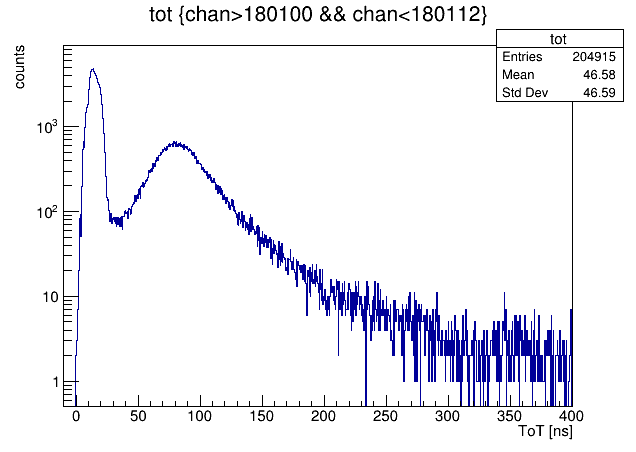

In [5]:
tdc=1801
disp_channels = 12
tree.Draw("tot>>tot(1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels))

htot = f.Get("tot")
c.SetLogy()
htot.GetXaxis().SetTitle("ToT [ns]")
htot.GetYaxis().SetTitle("counts")
c.Draw()

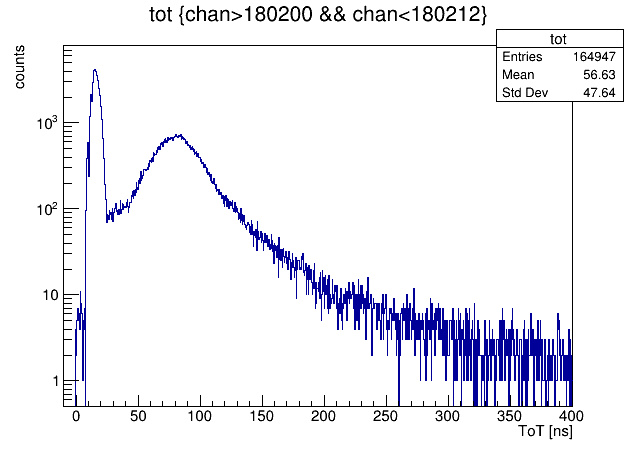

In [6]:
tdc=1802
disp_channels = 12
tree.Draw("tot>>tot(1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels))
htot = f.Get("tot")
c.SetLogy()
htot.GetXaxis().SetTitle("ToT [ns]")
htot.GetYaxis().SetTitle("counts")
c.Draw()

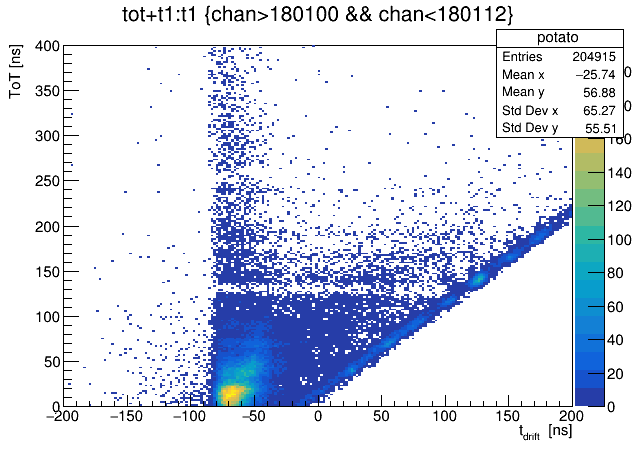

In [7]:
tdc=1801
disp_channels = 12
#tree.Draw("tot:t1>>tot_meta(1000,-1000,2000,1000,-10,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")
#tree.Draw("tot:t1>>potato(200,-200,200,200,0,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")
tree.Draw("tot+t1:t1>>potato(200,-200,200,200,0,400)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")

htot = f.Get("potato")
c.SetLogy(0)
htot.GetYaxis().SetTitle("ToT [ns]")
htot.GetXaxis().SetTitle("t_{drift}  [ns]")
c.Draw()

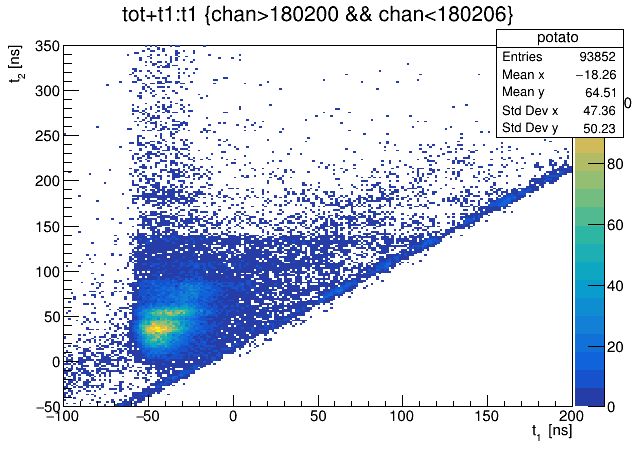

In [8]:
tdc=1802
disp_channels = 6
tree.Draw("tot+t1:t1>>potato(200,-100,200,200,-50,350)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"colz")

# tree.Draw("tot+t1>>potato(200,0,300)","chan>{:d} && chan<{:d}".format(tdc*100,tdc*100+disp_channels),"")


htot = f.Get("potato")
c.SetLogy(0)
# htot.GetYaxis().SetTitle("ToT [ns]")
htot.GetXaxis().SetTitle("t_{2} [ns]")
htot.GetYaxis().SetTitle("t_{2} [ns]")
htot.GetXaxis().SetTitle("t_{1}  [ns]")

c.Draw()

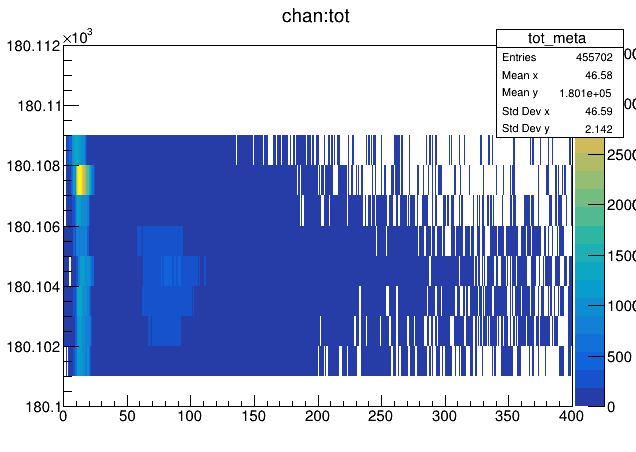

In [9]:

tdc=1801
disp_channels = 12
#tree.Draw("chan:t1","","lego2")
tree.Draw("chan:tot>>tot_meta(400,0,400,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

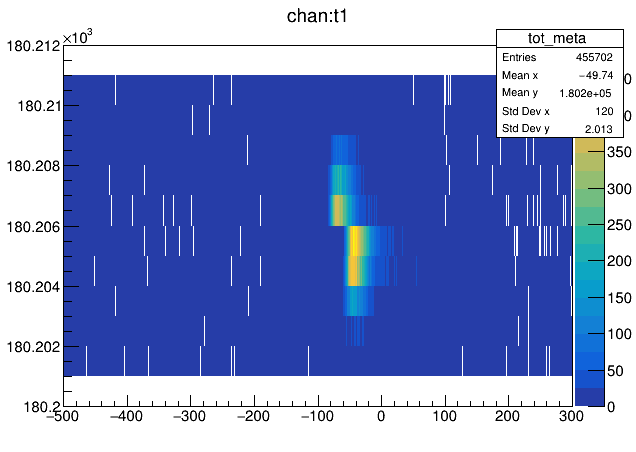

In [10]:
##################################################
##             overview TDC 0x0351              ##
##################################################
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

tdc=1802
disp_channels = 12
#tree.Draw("chan:t1","","lego2")
tree.Draw("chan:t1>>tot_meta(1000,-500,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

In [ ]:
##################################################
##            read root tree example            ##
##################################################

from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "/workdir/my_event.h"')
tree = f.Get("joint_tree")


t1_l = -3000
t1_r = 10000
tot_cutmin = 80

## variables that will be filled from root tree:
last_evt = 0

entries = tree.GetEntries()
print("tree has {:d} entries".format(entries))

processed_tracks = 0

# coinc_matrix = ROOT.TH2F("coinc_matrix","coinc_matrix", 12, 180100.5, 180112.5, 12, 180200, 180212)
coinc_matrix = ROOT.TH2F("coinc_matrix","coinc_matrix", 12, 180100.5, 180112.5, 12, 35100.5, 35112.5)
w = 50
coinc_wires = ROOT.TH2F("coinc_wires","coinc_wires", w, 0, w, w, 0, w)

meta_fish = ROOT.TH2F("meta_fish","meta_fish",200, -150, 100, 200, -120, 80);


entries_limit = int(1e6)

layer1_fish_wire = 180104
layer2_fish_wire = 35104

#for i in range(0,entries):
for i in range(0,np.min([entries_limit,entries])):
  
  tree.GetEntry(i)
  this_event = tree.event
  hits = this_event.hits
  
  n_hits = hits.size()
    
  for hit_no_a in range(0,n_hits):
    hit_a = hits[hit_no_a]
    for hit_no_b in range(hit_no_a,n_hits):
      hit_b = hits[hit_no_b]
    
      if ( (hit_a.t1 > t1_l and hit_a.t1 < t1_r)  and  (hit_b.t1 > t1_l and hit_b.t1 < t1_r) ):
      
        coinc_matrix.Fill(hit_a.chan,hit_b.chan)    
          
        coinc_wires.Fill(hit_a.wire + (hit_a.layer-1)*20 ,hit_b.wire + (hit_b.layer-1)*20)      
      
        if ( hit_a.tot > tot_cutmin and hit_b.tot > tot_cutmin and  (hit_a.chan == layer1_fish_wire) and  (hit_b.chan == layer2_fish_wire ) ):
          meta_fish.Fill(hit_a.t1 + hit_b.t1, hit_a.t1 - hit_b.t1)


#coinc_matrix.GetXaxis().SetRangeUser(35000,35050)
#coinc_matrix.GetYaxis().SetRangeUser(35000,35050)
coinc_matrix.Draw("colz")

c.Draw()
c2 = ROOT.TCanvas("myCanvasNam2e","The Canvas Title",500,400)
meta_fish.GetXaxis().SetRangeUser(-400,00)
meta_fish.Draw("colz")
c2.Draw() 

tree has 82234 entries


In [ ]:
c = [None]*100
meta_fishA = [None]*100
for channelaa in range(3,7):
    
    meta_fishA[channelaa] = ROOT.TH2F("meta_fish{:d}".format(channelaa),"meta_fish", 100, -500, 500, 50, -250, 250);
    layer1_fish_wire = 180104
    layer2_fish_wire = 180205
    #for i in range(0,entries):
    for i in range(0,np.min([entries_limit,entries])):

      tree.GetEntry(i)
      this_event = tree.event
      hits = this_event.hits

      n_hits = hits.size()

      for hit_no_a in range(0,n_hits):
        hit_a = hits[hit_no_a]
        for hit_no_b in range(hit_no_a,n_hits):
          hit_b = hits[hit_no_b]

          if ( (hit_a.t1 > t1_l and hit_a.t1 < t1_r)  and  (hit_b.t1 > t1_l and hit_b.t1 < t1_r) ):


            if (   (hit_a.chan == layer1_fish_wire) and  (hit_b.chan == layer2_fish_wire ) ):
              meta_fishA[channelaa].Fill(hit_a.t1 + hit_b.t1, hit_a.t1 - hit_b.t1)


    c[channelaa] = ROOT.TCanvas("fish{:d}".format(channelaa) ,"The Canvas Title",500,400)
    #meta_fishA[channelaa].GetXaxis().SetRangeUser(-200,300)
    meta_fishA[channelaa].Draw("colz")
    c[channelaa] .Draw()

In [ ]:
#archive(label="ID_{:s}_tot_data_cosy2021_lena_newMBOs".format(dataset_id))

#### 